In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product

## Read Data

In [3]:
items = pd.read_csv('data/items.csv')
item_categories = pd.read_csv('data/item_categories.csv')
sales = pd.read_csv('data/sales_train_v2.csv')
shops = pd.read_csv('data/shops.csv')
test = pd.read_csv('data/test.csv')

## View the datasets

In [4]:
sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [5]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [6]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [7]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [8]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [ ]:
submission.head()

## EDA

In [9]:
sales.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [10]:
items.describe()

,item_id,item_category_id
count,22170.00000,22170.000000
mean,11084.50000,46.290753
std,6400.07207,15.941486
min,0.00000,0.000000
25%,5542.25000,37.000000
50%,11084.50000,40.000000
75%,16626.75000,58.000000
max,22169.00000,83.000000


In [11]:
item_categories.describe()

,item_category_id
count,84.000000
mean,41.500000
std,24.392622
min,0.000000
25%,20.750000
50%,41.500000
75%,62.250000
max,83.000000


In [12]:
shops.describe()

,shop_id
count,60.000000
mean,29.500000
std,17.464249
min,0.000000
25%,14.750000
50%,29.500000
75%,44.250000
max,59.000000


In [14]:
test.describe()

,ID,shop_id,item_id
count,214200.000000,214200.000000,214200.000000
mean,107099.500000,31.642857,11019.398627
std,61834.358168,17.561933,6252.644590
min,0.000000,2.000000,30.000000
25%,53549.750000,16.000000,5381.500000
50%,107099.500000,34.500000,11203.000000
75%,160649.250000,47.000000,16071.500000
max,214199.000000,59.000000,22167.000000


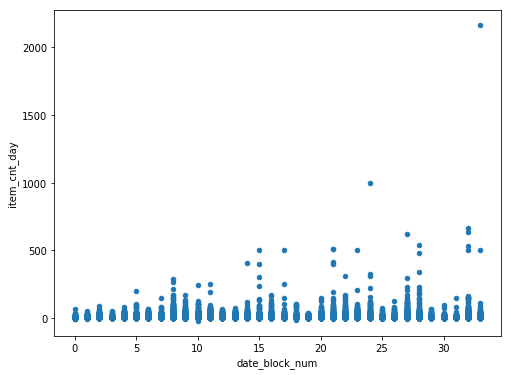

In [16]:
# scatter plot of item_cnt_day vs date_block_num
# there is a huge sale in the final month that exceeded 2000 items

sales.plot.scatter(x='date_block_num', y='item_cnt_day', figsize=(8,6));

In [36]:
sales[sales['item_cnt_day'] > 900]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2326930,15.01.2015,24,12,20949,4.000000,1000.0
2909818,28.10.2015,33,12,11373,0.908714,2169.0


In [37]:
# looks like it is plastic bags
items[items['item_id']==20949].item_name

20949    Фирменный пакет майка 1С Интерес белый (34*42)...
Name: item_name, dtype: object

In [38]:
# looks like it is a delivery service
items[items['item_id']==11373].item_name

11373    Доставка до пункта выдачи (Boxberry)
Name: item_name, dtype: object

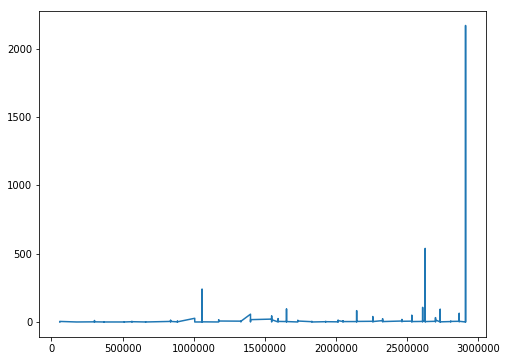

In [70]:
# plot sales history of item 11373
# probably should remove outlier
sales[sales['item_id']==11373].item_cnt_day.plot(figsize=(8,6));

In [69]:
# check if item 11373 is in test
test[test['item_id']==11373]

,ID,shop_id,item_id
1596,1596,5,11373
6696,6696,4,11373
11796,11796,6,11373
16896,16896,3,11373
21996,21996,2,11373
27096,27096,7,11373
32196,32196,10,11373
37296,37296,12,11373
42396,42396,28,11373
47496,47496,31,11373


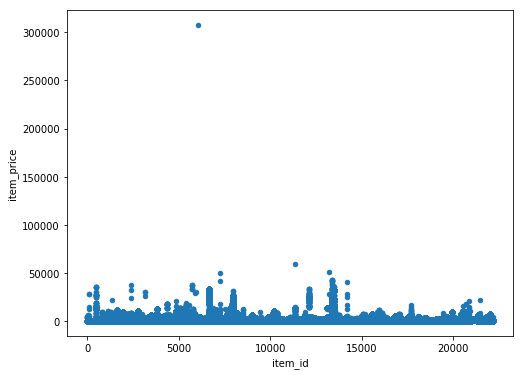

In [17]:
# scatter plot of item_id vs item_price
# expect prices for each item to be closely grouped together
# appears to be one outlier that exceeds $300,000

sales.plot.scatter(x='item_id', y='item_price', figsize=(8,6));

In [73]:
# 99 percentile of item_price in train
np.percentile(sales.item_price, 99)

5999.0

In [32]:
sales[sales['item_price'] > 300000].item_id

1163158    6066
Name: item_id, dtype: int64

In [33]:
sales[sales['item_id'] == 6066]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1163158,13.12.2013,11,12,6066,307980.0,1.0


In [34]:
items[items['item_id'] == 6066].item_name

6066    Radmin 3  - 522 лиц.
Name: item_name, dtype: object

In [71]:
# item 6066 is not in test.
# can delete safely
test[test['item_id'] == 6066]

,ID,shop_id,item_id


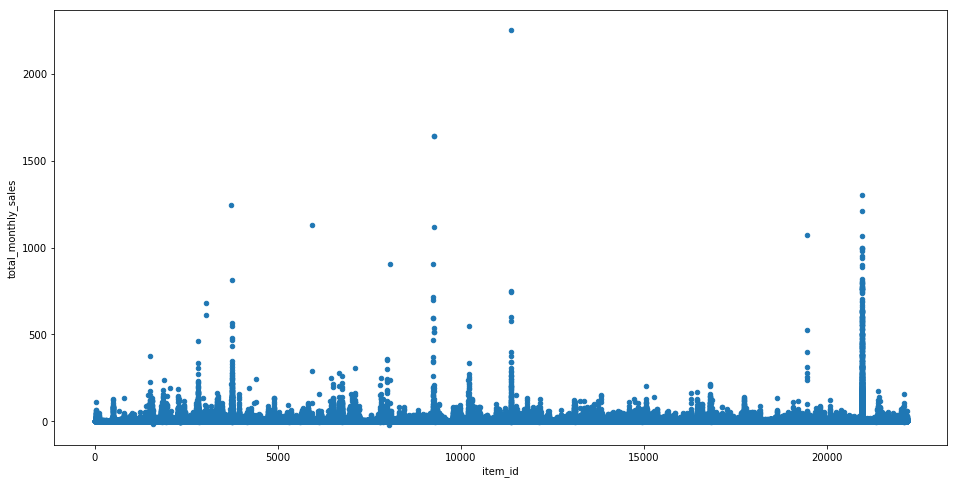

In [85]:
item_id_monthly_sales = sales.groupby(['date_block_num', 'shop_id', 'item_id']).agg({'item_cnt_day':'sum'})
item_id_monthly_sales = item_id_monthly_sales.reset_index()
item_id_monthly_sales.rename(index=str, columns={"item_cnt_day": "total_monthly_sales"}, inplace=True)
item_id_monthly_sales.plot.scatter(x='item_id', y='total_monthly_sales', figsize=(16,8));

In [87]:
np.percentile(item_id_monthly_sales.total_monthly_sales, 99.99)

353.5261999987997

In [84]:
item_id_monthly_sales.head()

,date_block_num,shop_id,item_id,item_cnt_day
0,0,0,32,6.0
1,0,0,33,3.0
2,0,0,35,1.0
3,0,0,43,1.0
4,0,0,51,2.0


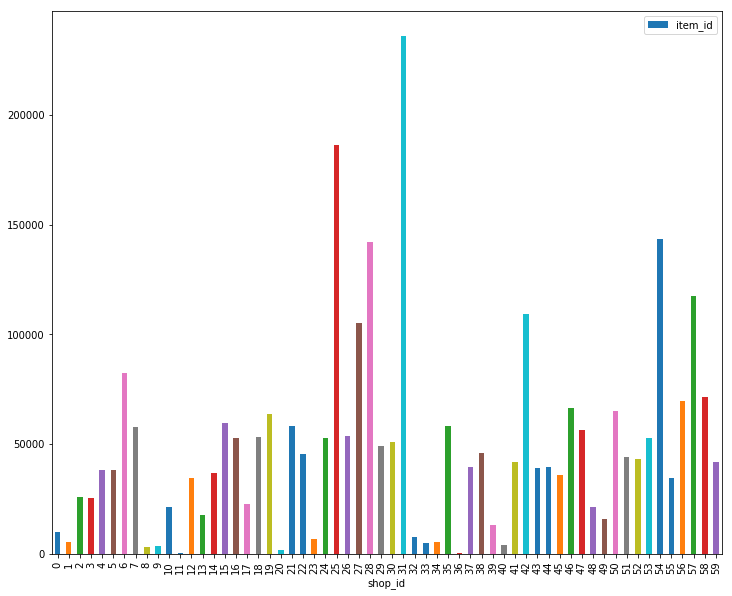

In [20]:
# Plot number of unique items sold in each shop in train
sales.groupby(['shop_id']).agg({'item_id':'count'}).sort_index().plot.bar(y='item_id', figsize=(12,10));

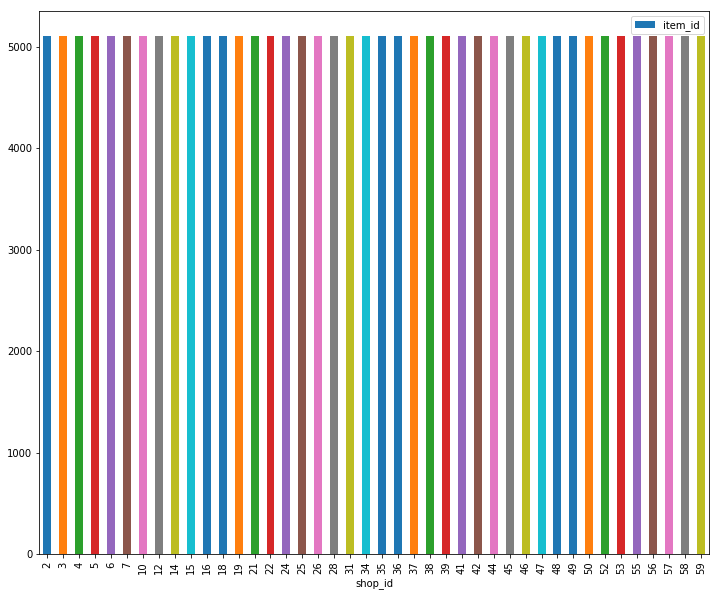

In [21]:
# Plot number of unique items to be sold in each shop in test
test.groupby(['shop_id']).agg({'item_id':'count'}).sort_index().plot.bar(y='item_id', figsize=(12,10));

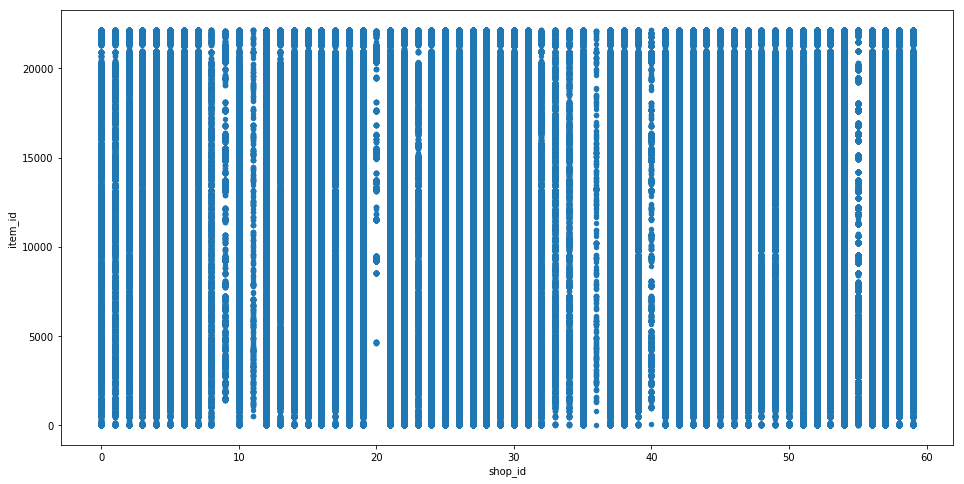

In [63]:
# scatter plot of item_id vs shop_id in train
sales.plot.scatter(x='shop_id', y='item_id', figsize=(16,8));

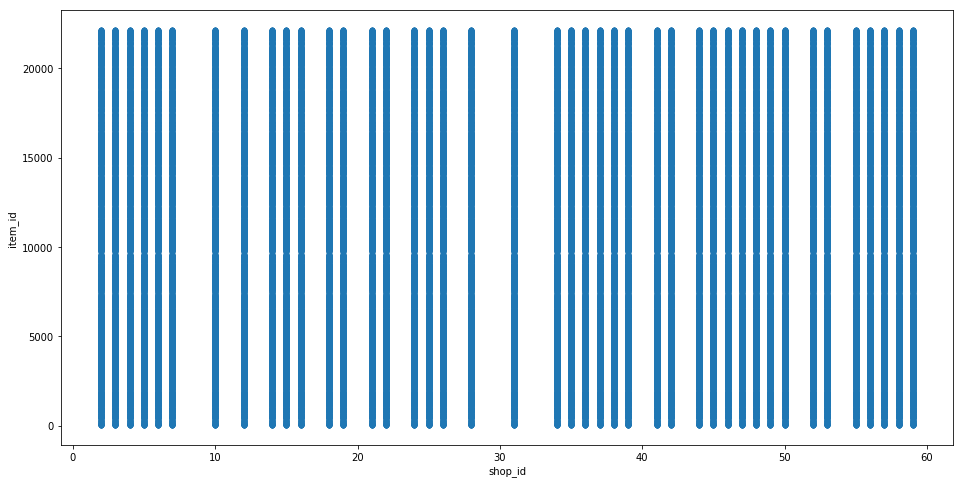

In [64]:
# scatter plot of item_id vs shop_id in test
test.plot.scatter(x='shop_id', y='item_id', figsize=(16,8));

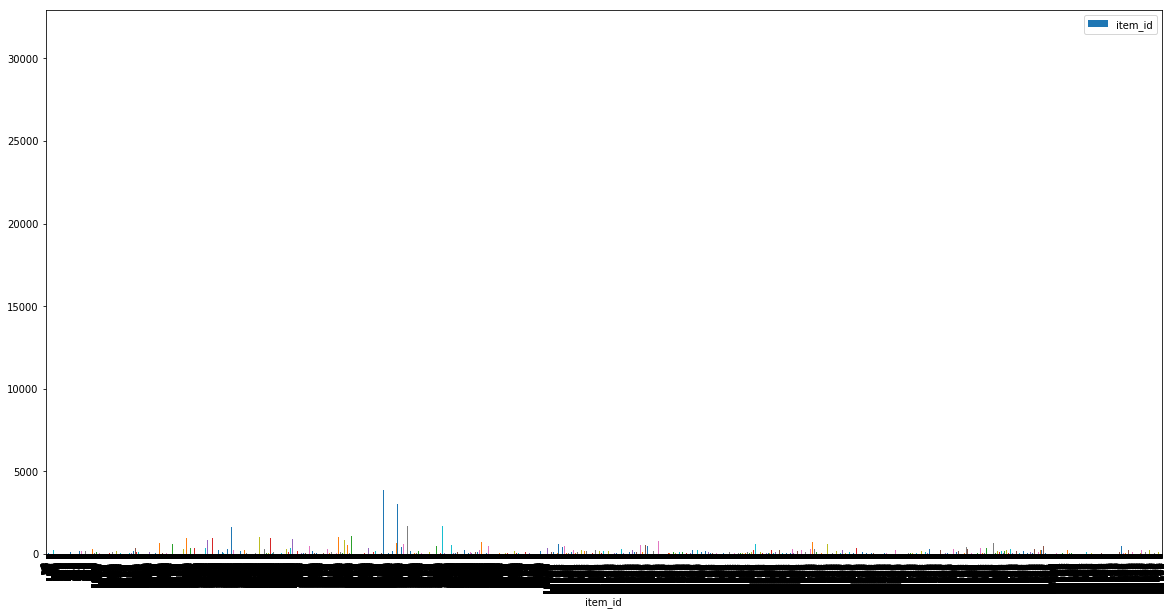

In [27]:
# Plot count of each items in the train
sales.groupby(['item_id']).agg({'item_id':'count'}).sort_index().plot.bar(y='item_id', figsize=(20,10));

In [30]:
# Find which item has extremely high count
sales.groupby(['item_id']).agg({'item_id':'count'}).sort_values(by='item_id', ascending=False).head()

C:\Users\Josh Lee\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'item_id' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


,item_id
item_id,
20949,31340
5822,9408
17717,9067
2808,7479
4181,6853


In [31]:
items[items['item_id'] == 20949].item_name

20949    Фирменный пакет майка 1С Интерес белый (34*42)...
Name: item_name, dtype: object

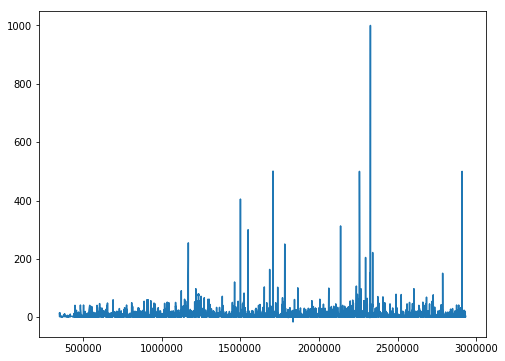

In [68]:
# plot sales history of item 20949
sales[sales['item_id'] == 20949].item_cnt_day.plot(figsize=(8,6));

In [65]:
# Item 20949 is in test set
test[test['item_id'] == 20949]

,ID,shop_id,item_id
460,460,5,20949
5560,5560,4,20949
10660,10660,6,20949
15760,15760,3,20949
20860,20860,2,20949
25960,25960,7,20949
31060,31060,10,20949
36160,36160,12,20949
41260,41260,28,20949
46360,46360,31,20949


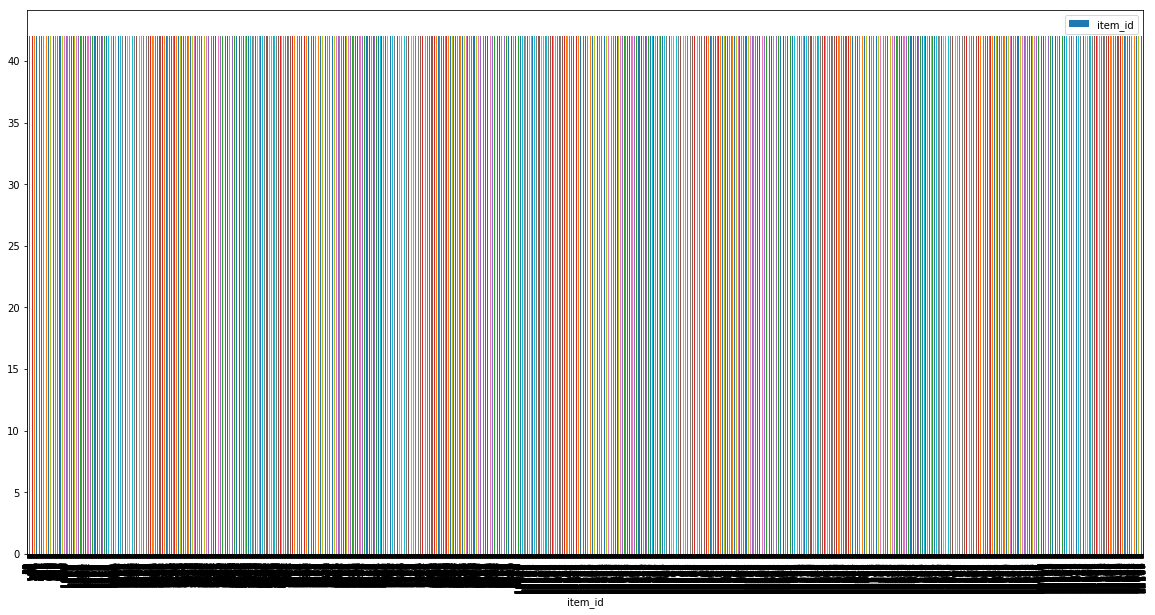

In [23]:
# Plot count of each items in the test
test.groupby(['item_id']).agg({'item_id':'count'}).sort_index().plot.bar(y='item_id', figsize=(20,10));

The shop_id, item_id distribution in the test is likely to be sampled in the same fashion for all shops. The same subset of items are picked and assigned to every shops in test set. The train set contains combination of shop_id and item_id that were actually sold.

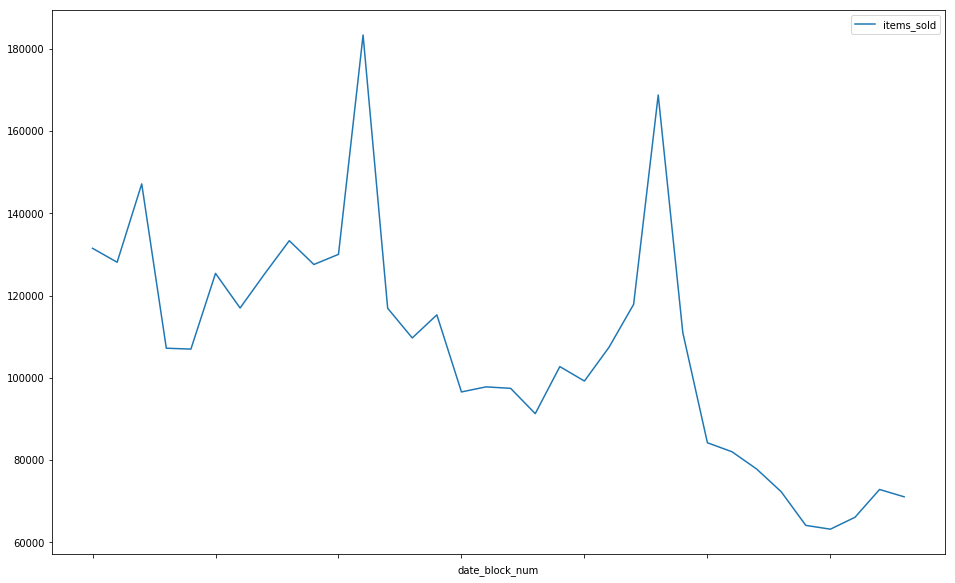

In [40]:
sales_by_month = sales.groupby(['date_block_num']).agg({"item_cnt_day":"sum"})
sales_by_month.rename(index=str, columns={"item_cnt_day": "items_sold"},inplace=True)
sales_by_month.plot(y='items_sold', figsize=(16,10));

Appears to be some seasonality trend in the sales of items.

In [44]:
# Missing
train_shop_item = sales[['shop_id','item_id']].drop_duplicates()

In [48]:
train_shop_item.head()

,shop_id,item_id
0,59,22154
1,25,2552
3,25,2554
4,25,2555
5,25,2564


In [46]:
test_shop_item = test[['shop_id','item_id']].drop_duplicates()

In [47]:
test_shop_item.head()

,shop_id,item_id
0,5,5037
1,5,5320
2,5,5233
3,5,5232
4,5,5268


In [54]:
# Find all test shop_id, item_id pair not found in train
df_all = pd.merge(test_shop_item, train_shop_item, on=['shop_id','item_id'],\
                  how='left', indicator=True)

In [59]:
df_all.head()

,shop_id,item_id,_merge
0,5,5037,both
1,5,5320,left_only
2,5,5233,both
3,5,5232,both
4,5,5268,left_only


In [60]:
missing_in_train = df_all[df_all['_merge'] == 'left_only']
missing_in_train

,shop_id,item_id,_merge
1,5,5320,left_only
4,5,5268,left_only
9,5,5003,left_only
16,5,4874,left_only
21,5,5002,left_only
25,5,5907,left_only
26,5,5908,left_only
31,5,5668,left_only
45,5,5826,left_only
64,5,3538,left_only


In [58]:
train_shop_item[(train_shop_item['shop_id'] == 5) & (train_shop_item['item_id'] == 5268)]

,shop_id,item_id


There are 102,796 shop_id, item_id pairs in the test dataset that is not in train dataset

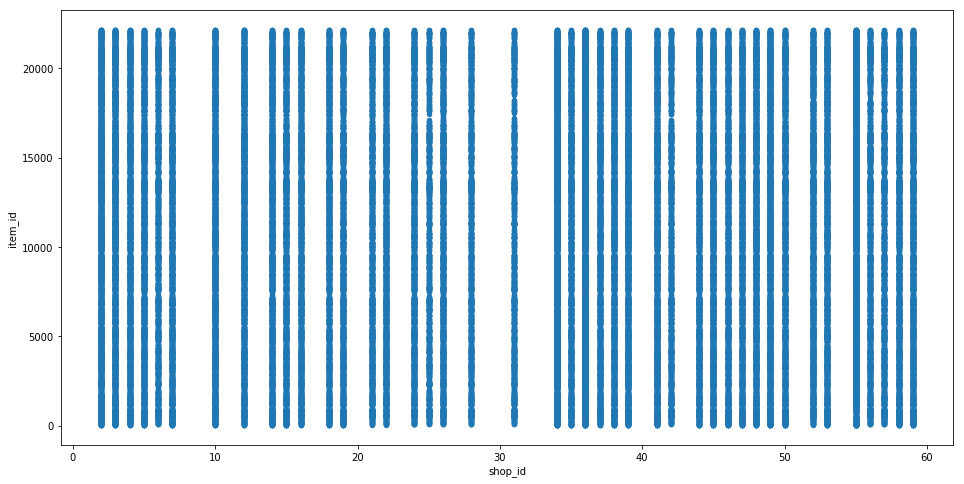

In [62]:
missing_in_train.plot.scatter(x='shop_id', y='item_id', figsize=(16,8));